In [ ]:
# MRV VYSHNAVI 
# BL.EN.U4CSE21114

In [ ]:
#A1

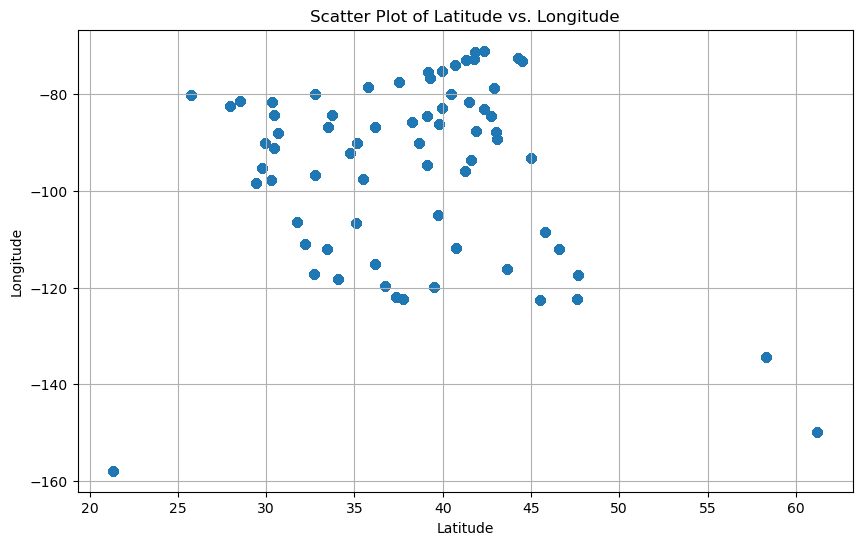

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('ML_Dataset_final.csv')


x = df['Latitude']  
y = df['Longitude']       


plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)  
plt.title('Scatter Plot of Latitude vs. Longitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.grid(True)
plt.show()


In [ ]:
#A2,A3

Coefficients: [0.00032108]
Intercept: 60.01762007837769
R-squared (Coefficient of determination): 4.535169206842937e-08
Mean Squared Error (MSE): 304.39707215672354
Coefficients: 
 [0.00032108]
Mean squared error: 304.40
Coefficient of determination (R^2): -0.07


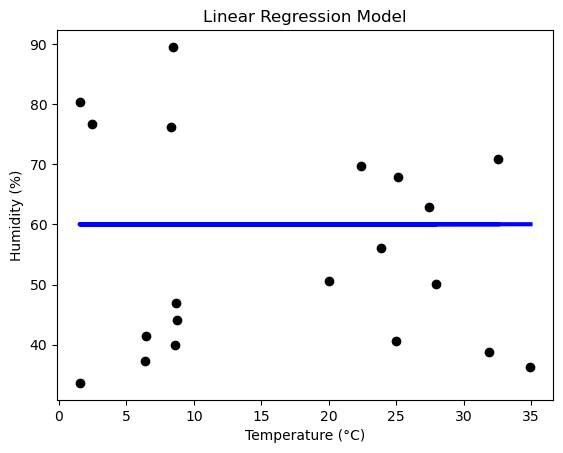

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv('ML_Dataset_final.csv')


X = df[['Temperature (°C)']]  
y = df['Humidity (%)']        


X_train = X[:-20]
X_test = X[-20:]
y_train = y[:-20]
y_test = y[-20:]


regr = LinearRegression()


regr.fit(X_train, y_train)
coefficients = regr.coef_  
intercept = regr.intercept_  
score = regr.score(X, y) 


print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")
print(f"R-squared (Coefficient of determination): {score}")


y_pred = regr.predict(X_test)


mse = mean_squared_error(y_test, y_pred)


print(f"Mean Squared Error (MSE): {mse}")



print("Coefficients: \n", regr.coef_)

mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: %.2f" % mse)

r2 = r2_score(y_test, y_pred)
print("Coefficient of determination (R^2): %.2f" % r2)

plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.title("Linear Regression Model")
plt.show()




In [ ]:
#A4

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv('ML_Dataset_final.csv')


class1 = 'Country,Folk'
class2 = 'Pop,Rock,Jazz'

df_binary = df[(df['Music Genre Preferences'] == class1) | (df['Music Genre Preferences'] == class2)]


X = df_binary[['Temperature (°C)', 'Humidity (%)']]  
y = df_binary['Music Genre Preferences']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = LogisticRegression(max_iter=1000)


clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)


print(f"Test Set Accuracy: {accuracy:.2f}")


coefficients = clf.coef_ 
intercept = clf.intercept_  
classes = clf.classes_ 
n_iter = clf.n_iter_ 


print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")
print(f"Classes: {classes}")
print(f"Number of Iterations: {n_iter}")


confusion = confusion_matrix(y_test, y_pred) 
report = classification_report(y_test, y_pred)  

print("Confusion Matrix:")
print(confusion)

print("Classification Report:")
print(report)


Test Set Accuracy: 0.50
Coefficients: [[4.55046539e-05 2.56980144e-04]]
Intercept: [-0.02069159]
Classes: ['Country,Folk' 'Pop,Rock,Jazz']
Number of Iterations: [10]
Confusion Matrix:
[[27168  7526]
 [27688  7604]]
Classification Report:
               precision    recall  f1-score   support

 Country,Folk       0.50      0.78      0.61     34694
Pop,Rock,Jazz       0.50      0.22      0.30     35292

     accuracy                           0.50     69986
    macro avg       0.50      0.50      0.45     69986
 weighted avg       0.50      0.50      0.45     69986



In [ ]:
#A5

C:\Users\mudun\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


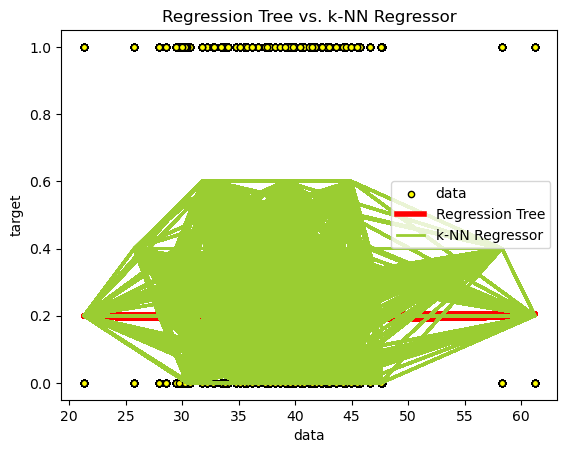

Mean Squared Error (Regression Tree): 0.1600141622373058
Mean Squared Error (k-NN Regressor): 0.18495469313598156


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split  
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

X = df['Latitude']
X_array = X.to_numpy()
X_reshaped = X_array.reshape(-1, 1)
X = X_reshaped
y = df['Music Genre Preferences'] == 'Pop,Rock,Jazz'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


tree_regressor = DecisionTreeRegressor(max_depth=5)
tree_regressor.fit(X_train, y_train)
y_tree_pred = tree_regressor.predict(X_test)

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)
y_knn_pred = knn_regressor.predict(X_test)


mse_tree = mean_squared_error(y_test, y_tree_pred)
mse_knn = mean_squared_error(y_test, y_knn_pred)


plt.figure()
plt.scatter(X_test, y_test, s=20, edgecolor="black", c="yellow", label="data")
plt.plot(X_test, y_tree_pred, color="red", label="Regression Tree", linewidth=4)
plt.plot(X_test, y_knn_pred, color="yellowgreen", label="k-NN Regressor", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Regression Tree vs. k-NN Regressor")
plt.legend()
plt.show()

print("Mean Squared Error (Regression Tree):", mse_tree)
print("Mean Squared Error (k-NN Regressor):", mse_knn)